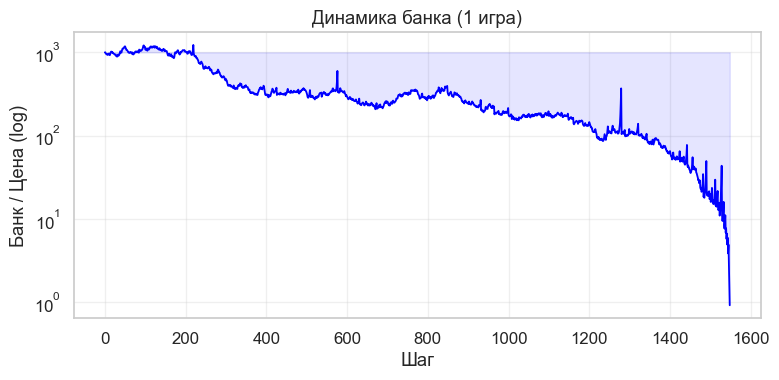

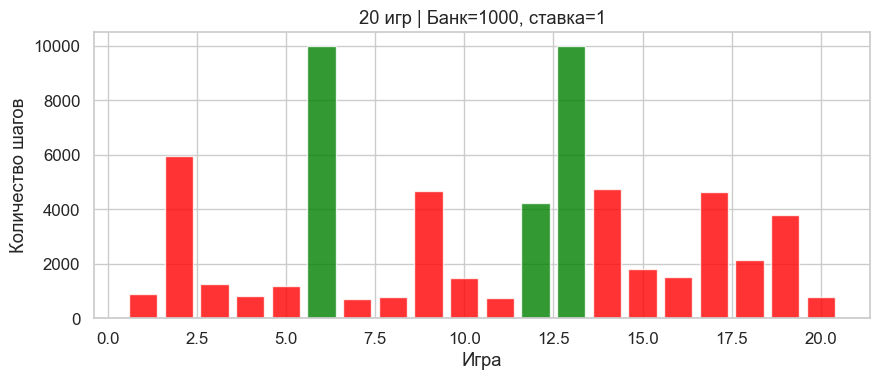

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.1)


def play_game(bet=10, bank_start=1000, max_steps=10000):
    p = 0.5
    bank = bank_start
    history = [bank]

    current_bet = bet
    volatility = 0.02 

    for _ in range(max_steps):
        if bank < current_bet:
            break

        volatility = 0.9 * volatility + 0.1 * np.random.uniform(0.005, 0.05)


        log_return = np.random.normal(0, volatility)
        bank *= np.exp(log_return)

        bank -= current_bet
        if np.random.random() < p:
            bank += 2 * current_bet
            current_bet *= 2
        else:
            current_bet = bet

        history.append(bank)

        if bank <= 0:
            break

    return np.array(history)


def plot_single_game(history):
    x = np.arange(len(history))

    plt.figure(figsize=(8, 4))
    plt.plot(x, history, linewidth=1.3, color='blue')
    plt.fill_between(x, history, history[0], color='blue', alpha=0.1)
    plt.yscale("log") 
    plt.xlabel("Шаг")
    plt.ylabel("Банк / Цена (log)")
    plt.title("Динамика банка (1 игра)")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


def plot_20_games_histogram(results, bank, bet):
    """
    Гистограмма количества шагов 20 игр
    """
    steps = [r[2] for r in results]
    wins = [r[1] for r in results]

    colors = ['green' if w else 'red' for w in wins]

    plt.figure(figsize=(9, 4))
    plt.bar(range(1, len(steps) + 1), steps, color=colors, alpha=0.8)
    plt.xlabel("Игра")
    plt.ylabel("Количество шагов")
    plt.title(f"20 игр | Банк={bank}, ставка={bet}")
    plt.tight_layout()
    plt.show()


def statistics_1000_games(bet=10, bank_start=1000, games=1000):
    """
    Статистика для 1000 игр
    """
    wins = 0
    profits = []

    for _ in range(games):
        history = play_game(bet, bank_start)
        win = history[-1] >= bank_start
        profit = history[-1] - bank_start

        if win:
            wins += 1
            profits.append(profit)

    win_rate = wins / games * 100
    lose_rate = 100 - win_rate
    avg_profit = np.mean(profits) if profits else 0

    print("СТАТИСТИКА ДЛЯ 1000 ИГР")
    print(f"Ставка: {bet}")
    print(f"Процент выигрыша: {win_rate:.2f}%")
    print(f"Процент проигрыша: {lose_rate:.2f}%")
    print(f"Средний выигрыш (если выиграл): {avg_profit:.2f}")


BET = 1 
BANK = 1000

history = play_game(BET, BANK)
plot_single_game(history)

results_20 = []
for _ in range(20):
    hist = play_game(BET, BANK)
    results_20.append((hist, hist[-1] >= BANK, len(hist), hist[-1] - BANK))
plot_20_games_histogram(results_20, BANK, BET)


statistics_1000_games(BET, BANK)